In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

### Delivery List dataset 1

In [2]:
df_DL=pd.read_csv('../../datasets/DeliveryList.csv')
df_DL[:3]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19


In [3]:
## dtype 및 null 값 확인
df_DL.info() ## 날짜 data 이용하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15000 non-null  object 
 1   상품명     15000 non-null  object 
 2   바코드     14992 non-null  float64
 3   발주가능상태  15000 non-null  object 
 4   입고수량    15000 non-null  int64  
 5   카테고리    15000 non-null  object 
 6   출고수량    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB


In [4]:
df_DL.describe(include=object) ## 2019-05-26 이런 형식은 주단위, 분기 단위를 사용하기 어려움.

,날짜,상품명,발주가능상태,카테고리
count,15000,15000,15000,15000
unique,84,528,3,8
top,2019-05-26,V2_114,발주가능,세탁세제
freq,226,47,14700,4265


In [5]:
df_DL['날짜_datetime'] = pd.to_datetime(df_DL['날짜']) ## 날짜의 object를 datetime으로 변경함. 
df_DL[:2]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16


In [6]:
df_DL.describe(include=datetime) ## .describe, .describe(include=object) 둘다 안나옴. 

NameError: name 'datetime' is not defined

In [7]:
## 날짜_datetime은 dt라는 function을 쓸 수 있음. 
df_DL['날짜_datetime_year'] = df_DL['날짜_datetime'].dt.year

<Axes: xlabel='날짜_datetime_year', ylabel='출고수량'>

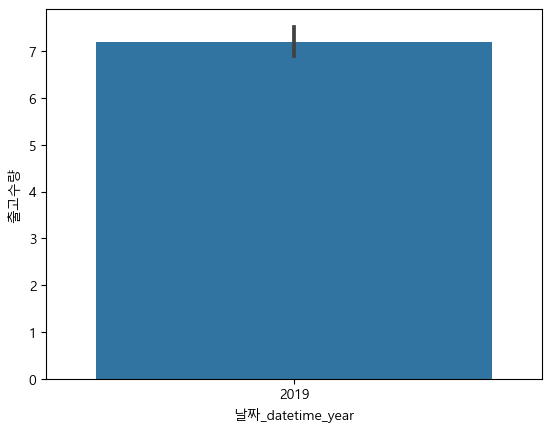

In [10]:
sns.barplot(data=df_DL, x='날짜_datetime_year',y='출고수량')

In [11]:
## 날짜_datetime은 dt라는 function을 쓸 수 있음. 
df_DL['날짜_datetime_month'] = df_DL['날짜_datetime'].dt.month

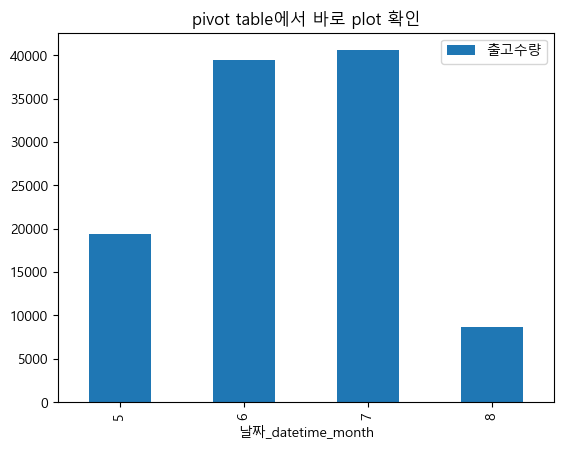

In [12]:
pd.pivot_table(data=df_DL, index='날짜_datetime_month', values='출고수량', aggfunc=sum).plot(kind='bar')
## pivot_table(data, index, values, aggfunc,).plot(kind='bar') 이렇게 사용 가능 
##⇒ 1차 방법(2차 데이터 사용시)
plt.title('pivot table에서 바로 plot 확인')
plt.show()

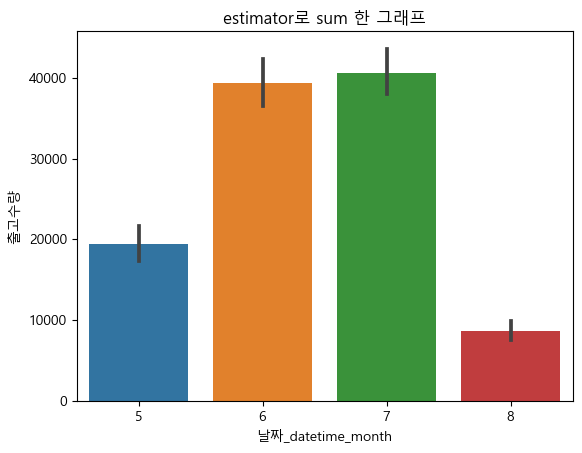

In [13]:
sns.barplot(data=df_DL, x='날짜_datetime_month',y='출고수량', estimator=sum) ## ⇒ 2차 방법(단순시각화)
plt.title('estimator로 sum 한 그래프')
plt.show()


In [14]:
df_DL['날짜_datetime_week'] = df_DL['날짜_datetime'].dt.weekofyear ## 전체 년도에서 몇번째 주 에 해당하는가를 표현 , dt.isocalendar().week 가능

C:\Users\01-15\AppData\Local\Temp\ipykernel_9648\2222128090.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_DL['날짜_datetime_week'] = df_DL['날짜_datetime'].dt.weekofyear ## 전체 년도에서 몇번째 주 에 해당하는가를 표현 , dt.isocalendar().week 가능


In [15]:
df_DL[:3]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,날짜_datetime_year,날짜_datetime_month,날짜_datetime_week
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019,5,20
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019,5,20
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19,2019-05-16,2019,5,20


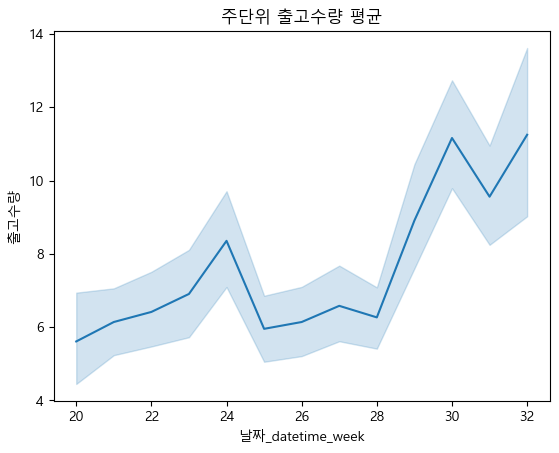

In [16]:
sns.lineplot(data=df_DL, x='날짜_datetime_week', y='출고수량')
plt.title('주단위 출고수량 평균')
plt.show()

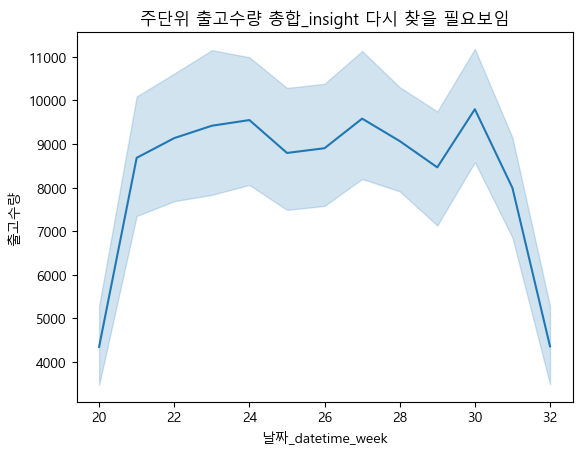

In [17]:
sns.lineplot(data=df_DL, x='날짜_datetime_week', y='출고수량', estimator='sum')
plt.title('주단위 출고수량 총합_insight 다시 찾을 필요보임')
plt.show()

### Delivery List dataset 2

In [19]:
df_DL2=pd.read_csv('../../datasets/DeliveryList2.csv')
df_DL2[:3]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230


In [20]:
df_DL2.describe(datetime_is_numeric=True)

,상품구매금액,상품번호,수량,주문일
count,4.674900e+04,46661.000000,46749.000000,4.674900e+04
mean,6.936814e+04,763.193073,1.177822,2.018404e+07
std,6.611247e+04,456.323734,0.683334,5.192403e+03
min,0.000000e+00,38.000000,1.000000,2.017010e+07
25%,3.288000e+04,378.000000,1.000000,2.018073e+07
50%,6.778000e+04,928.000000,1.000000,2.018112e+07
75%,9.213000e+04,1209.000000,1.000000,2.019022e+07
max,4.963400e+06,1681.000000,50.000000,2.019062e+07


In [21]:
df_DL2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   결제수단    46749 non-null  object 
 1   배송번호    46749 non-null  object 
 2   배송시작일   46749 non-null  object 
 3   배송완료일   46749 non-null  object 
 4   상품구매금액  46749 non-null  int64  
 5   상품번호    46661 non-null  float64
 6   수량      46749 non-null  int64  
 7   주문경로    46749 non-null  object 
 8   주문일     46749 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


#### 주문일
    - 주문일을 요일별로 확인
    

#### 날짜가 int 일때는 object(str)1차 변경 후 datetime으로 변경

In [22]:
df_DL2['주문일'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 46749 entries, 0 to 46748
Series name: 주문일
Non-Null Count  Dtype
--------------  -----
46749 non-null  int64
dtypes: int64(1)
memory usage: 365.4 KB


In [23]:
## pd.to_datetime((['columns'].astype(str))
pd.to_datetime(df_DL2['주문일'].astype(str))

0       2018-12-27
1       2018-12-29
2       2018-12-30
3       2018-12-31
4       2018-12-31
           ...    
46744   2017-12-29
46745   2017-12-29
46746   2017-12-30
46747   2017-12-31
46748   2017-12-31
Name: 주문일, Length: 46749, dtype: datetime64[ns]

#### 배송시작일-배송완료일 차 
    - 조건1: 각 columns의 row 수가 일치해야함. 
    

#### 특정 기호가 들어간 object(str) 경우, apply() 적용 후 datetime 변경
    - 특정 기호: 오전, 오후 등. ex) 2019-01-07 오전 8:56
    - str를 slicing 하듯 하며 됨. str('2019-01-07 오전 8:56')[:10] 잘라서 datetime으로 변경하면됨. 
    ** 주의: slicing 된 값이 column에 존재해야함. 

In [40]:
# str('2019-01-07 오전 8:56')[:10]
def slicing_YMD(datetime_str) :
    return datetime_str[:10]


In [41]:
df_DL2['배송완료일_datetime'] = pd.to_datetime(df_DL2['배송완료일'].apply(slicing_YMD))

In [42]:
df_DL2['배송시작일_datetime'] = pd.to_datetime(df_DL2['배송시작일'].apply(slicing_YMD))

In [43]:
df_DL2[['배송시작일_datetime', '배송완료일_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   배송시작일_datetime  46749 non-null  datetime64[ns]
 1   배송완료일_datetime  46749 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 730.6 KB


In [44]:
df_DL2['배송_duration'] = df_DL2['배송완료일_datetime'] - df_DL2['배송시작일_datetime']
df_DL2.describe()

,상품구매금액,상품번호,수량,주문일,배송_duration
count,4.674900e+04,46661.000000,46749.000000,4.674900e+04,46749
mean,6.936814e+04,763.193073,1.177822,2.018404e+07,4 days 04:38:57.008278251
std,6.611247e+04,456.323734,0.683334,5.192403e+03,1 days 04:56:12.144368428
min,0.000000e+00,38.000000,1.000000,2.017010e+07,0 days 00:00:00
25%,3.288000e+04,378.000000,1.000000,2.018073e+07,4 days 00:00:00
50%,6.778000e+04,928.000000,1.000000,2.018112e+07,4 days 00:00:00
75%,9.213000e+04,1209.000000,1.000000,2.019022e+07,4 days 00:00:00
max,4.963400e+06,1681.000000,50.000000,2.019062e+07,47 days 00:00:00
